In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

This notebook contains code to
- Find no. viewers in US for season premiere and finale episodes
- Find ratings for season premiere and finale episodes

### Premiere vs finale

In [3]:
# Load data with ratings
df = pd.read_csv('../data/episode_info.csv') # paths in this notebook will need updating to final repo

# Create column for overall episode number in the whole TV show
df["overall_ep"] = df["season"].astype(str) + df["episode"].astype(str)

# Leave only one row per episode
df = df.drop_duplicates('overall_ep')

# Remove unnecessary rows
df = df.drop(columns=['director', 'release_date', 'all_cast', 'short_summary'])

# Load data with no. viewers
df_viewers = pd.read_csv('../data/creators.csv')

df_viewers["overall_ep"] = df_viewers["season"].astype(str) + df_viewers["epi"].astype(str) # epi = episode

df_viewers = df_viewers[['overall_ep','vie']] # vie = No. viewers in the US in millions

# Merged the two dfs
df_y = pd.merge(df, df_viewers, on='overall_ep')

In [5]:
# Create premiere/finale variable
df_y['prem_fin'] = 'reg' # all episodes in between

df_y.loc[(df_y['episode'] == 1), 'prem_fin'] = 'prem'

# df_subset = df_y[(df_y.episode == 1) | (df_y.episode > 17)] # >17 because shorter season has 18 episodes
# df_subset.groupby('season').episode.unique()

df_y.loc[((df_y['episode'] == 18) & (df_y['season'] == 10)), 'prem_fin'] = 'fin' 
df_y.loc[((df_y['episode'] == 25) & (df_y['season'] == 3) | 
          (df_y['episode'] == 25) & (df_y['season'] == 6)), 'prem_fin'] = 'fin'
df_y.loc[((df_y['episode'] == 24) & (df_y['season'] != 3) | 
          (df_y['episode'] == 24) & (df_y['season'] != 6)), 'prem_fin'] = 'fin'


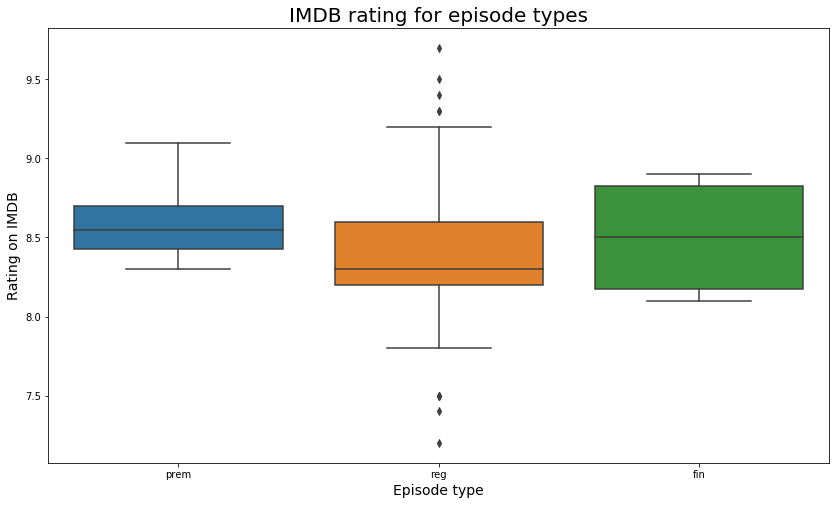

In [13]:
plt.figure(figsize = (14,8))

sns.boxplot(df_y.prem_fin, df_y.Rating)

plt.xlabel('Episode type', fontsize = 14)
plt.ylabel('Rating on IMDB', fontsize = 14)
plt.title('IMDB rating for episode types', fontsize = 20)

#plt.xticks(['reg', 'prem', 'fin'], ['Regular', 'Premiere', 'Finale'])

plt.show()

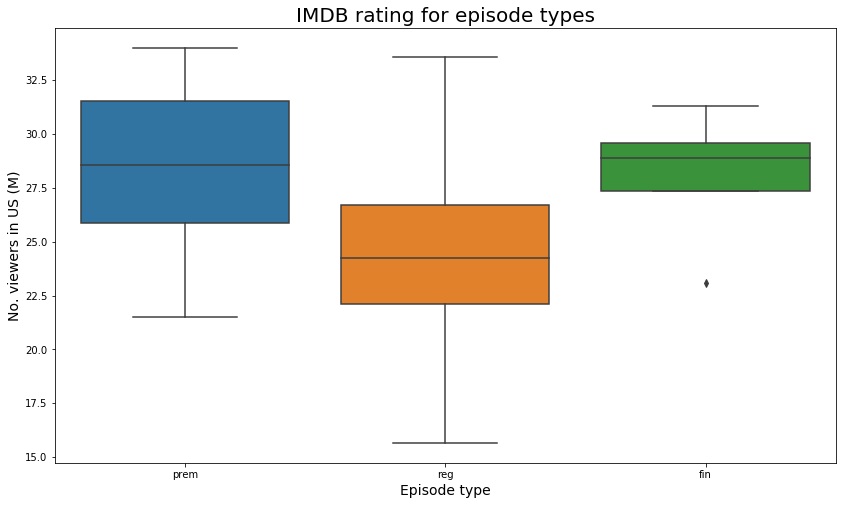

In [14]:
plt.figure(figsize = (14,8))

sns.boxplot(df_y.prem_fin, df_y.vie)

plt.xlabel('Episode type', fontsize = 14)
plt.ylabel('No. viewers in US (M)', fontsize = 14)
plt.title('IMDB rating for episode types', fontsize = 20)

#plt.xticks(['reg', 'prem', 'fin'], ['Regular', 'Premiere', 'Finale'])

plt.show()

### Do memorable quotes have an influence on episode rating on IMDB?

In [ ]:
# Load lines per character
chandler = pd.read_csv('./friends/data/Chandler.csv')

chandler['character'] = 'chandler'

joey = pd.read_csv('./friends/data/Joey.csv')

joey['character'] = 'joey'

monica = pd.read_csv('./friends/data/Monica.csv')

monica['character'] = 'monica'

phoebe = pd.read_csv('./friends/data/Phoebe.csv')

phoebe['character'] = 'phoebe'

rachel = pd.read_csv('./friends/data/Rachel.csv')

rachel['character'] = 'rachel'

ross = pd.read_csv('./friends/data/Ross.csv')

ross['character'] = 'ross'

frames = [chandler, joey, monica, phoebe, rachel, ross]

lines = pd.concat(frames, ignore_index = True)

lines.sample(10)


In [ ]:
lines['line'] = lines['line'].astype(str)

In [ ]:
# Clean data
lines = lines.reset_index(drop=True)
chars = re.compile('[/(){}\[\]\|@,;]')
chars2 = re.compile('[^0-9a-z #+_]')
stops = set(stopwords.words('english'))

def clean_text(text): # text needs to be a string
    text = text.lower() # lowercase text
    text = chars.sub(' ', text) # replace special characters with a space
    text = chars2.sub('', text) # remove characters in chars2 
    text = ' '.join(word for word in text.split() if word not in stops) # remove stopwors from text
    return text
lines['Dialogue'] = lines['line'].apply(clean_text) # save all changes to text in new column 'Dialogue'
lines['Dialogue'] = lines['Dialogue'].str.replace('\d+', '')
lines.head()

##### 1. Does the presence of a memorable quote in the episode affect its rating on IMDB, regardless of how many quotes there are or how many times it is uttered?

In [ ]:
# Catchphrase column stands for 'memorable quote in episode'
lines["catchphrase"] = lines["catchphrase"].fillna(0)

lines.loc[(lines['Dialogue'].str.contains('pivot')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('thanksgiving pants')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('we were on a break')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.endswith('how you doin')), 'catchphrase'] = 1 # to make sure cases where used in a normal way (instead of Joey's) not counted
# lines.loc[(lines['Dialogue'].str.contains('how you doin$')), 'catchphrase'] = 1 # if line above doesn't work
lines.loc[(lines['Dialogue'].str.contains('oh my god')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('oh my gaww')), 'catchphrase'] = 1 # in case Oh.My.God is spelled differently
lines.loc[(lines['Dialogue'].str.contains('holiday armadillo')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('my eyes')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('unagi')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('va fa napoli')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('that is brand new information')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('seven') & (lines['character'] == 'monica')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('my diamond shoes are too tight')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('oopah')), 'catchphrase'] = 1 # oopah stands as the end for whooopah
lines.loc[(lines['Dialogue'].str.contains('hes her lobster')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('they dont know we know they know we know')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('here come the meat sweats')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('i wish i could but i dont want to')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('im fine') & (lines['character'] == 'ross')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('im fiii')), 'catchphrase'] = 1 # in case I'm fine is spelled differently
lines.loc[(lines['Dialogue'].str.contains('sup with the wack playstation sup')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('friend zone')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('you cant say that you dont know')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('big dull dud')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('smell the fart acting')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('im breezy')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('joey doesnt share food')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('mmm noodle soup')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('could i be \w+ any more')), 'catchphrase'] = 1 # for lines saying could I be ... any more ...? 
#lines.loc[(lines['Dialogue'].str.contains('could i be')), 'catchphrase'] = 1 # If line right above does not work, comment and use this one


lines.sample(10)

In [ ]:
# Merge lines df with ratings

lines["overall_ep"] = lines["season"].astype(str) + lines["episode"].astype(str)

lines = pd.merge(lines, df[["overall_ep", "Rating"]], on="overall_ep", how="right")

lines.sample(10)

In [ ]:
plt.figure(figsize = (14,8))

sns.boxplot(lines.catchphrase, lines.Rating)

plt.xlabel('Memorable quote in episode', fontsize = 16)
plt.ylabel('Rating on IMDB', fontsize = 16)

plt.title('Episode rating depending on whether memorable quote present')

plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

##### 2. For episodes with memorable quotes, does the number of utterances affect their ratings?

In [ ]:
# Select episodes with quotes (henceforth 1st df)
quotes_in_episode = lines.loc[lines['catchphrase'] == 1]

# Create rating df (henceforth 2nd df), drop duplicates and convert overall_ep to index
rating_quotes = quotes_in_episode[['overall_ep', 'Rating']]
rating_quotes = rating_quotes.drop_duplicates('overall_ep', keep = 'last')
rating_quotes = rating_quotes.set_index('overall_ep')

# Drop rating columns in 1st df so rating does not sum
quotes_in_episode = quotes_in_episode.drop(columns=['Rating'])

# Sum memorable quotes by episode
quotes = quotes_in_episode.groupby(['overall_ep'])['catchphrase'].sum()

quotes = pd.DataFrame(quotes)

In [ ]:
# Select episodes without quotes
no_quotes_in_episode = lines.loc[lines['catchphrase'] == 0]

# In episodes without quotes, separate rating and drop duplicates
rating_no_quotes = no_quotes_in_episode[['overall_ep', 'Rating']]
rating_no_quotes = rating_no_quotes.drop_duplicates('overall_ep', keep = 'last')
rating_no_quotes = rating_no_quotes.set_index('overall_ep')

# Drop rating columns in no_quotes_in_episode to have homogenous dfs
no_quotes_in_episode = no_quotes_in_episode.drop(columns=['Rating'])

no_quotes = no_quotes_in_episode.groupby(['overall_ep'])['catchphrase'].sum()

no_quotes = pd.DataFrame(no_quotes)

In [ ]:
# Combine dfs, first quotes, then ratings
number_quotes = no_quotes.append(quotes)

ratings = rating_no_quotes.append(rating_quotes)

nq = number_quotes.join(ratings)

nq['overall_ep'] = nq.index

# Remove duplicated observations for episodes that were in both dfs
nq = nq.drop_duplicates('overall_ep', keep = 'last') # Last because the number of quotes appears at the end of df

In [ ]:
fig, ax = plt.subplots()

nq.plot.scatter(x = 'catchphrase', y = 'Rating', ax = ax)

ax.set_xlabel('No. memorable quotes in episode')

plt.show()

In [ ]:
# save df with number of quotes per episode
nq.to_csv(r'../data/number_quotes_in_episodes.csv')

## Rabbit hole plots

In [ ]:
# No. lines by character per episode per season (only for seasons 1 and 2)
seasons1_2 = lines.query('season < 3')
axI = seasons1_2.groupby(['character','season', 'episode'])['episode'].count().unstack(0).plot(title="No. lines by character per episode per season", figsize=(14,8))
_ = axI.set_xlabel('Season, episode')
_ = axI.set_ylabel('Count')

In [ ]:
# Total number of lines per character (whole show)
lines_total = lines.character.value_counts()
print(lines_total.head())

lines_total = lines.character.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(lines_total.index, lines_total.values, alpha=0.8)
plt.title('Lines per character in the whole show')
plt.ylabel('Line count', fontsize=12)
plt.xlabel('Character', fontsize=12)
plt.show()

In [ ]:
# Plot of number of lines per character per season
ax = lines.groupby(['character','season'])['season'].count().unstack(0).plot(title="No. lines by character per season", figsize=(14,8))
_ = ax.set_xlabel('Season')
_ = ax.set_ylabel('Count')

In [ ]:
# Exact no. lines per character per season
lines_season = lines.groupby(['character','season'])['season'].count().unstack(0)

print(lines_season.head())

print(type(lines_season))

In [ ]:
# Exact no. lines per character per episode per season
lines_episode = lines.groupby(['character', 'episode', 'season'])['season'].count().unstack(0)

print(lines_episode.head())

print(type(lines_episode))